# Particule dans une boîte uni-dimensionnelle

##### Germain Salvato-Vallverdu [germain.vallverdu@univ-pau.fr](germain.vallverdu@univ-pau.fr)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.constants import h, m_e, elementary_charge
%matplotlib inline

## Description du système

On considère une particule de masse $m$, se déplaçant librement sur un segment de longuer $L$. Pour un tel système, la partie énergie potentielle étant nulle (on choisit $\hat{V} = Cste = 0$) l'équation de Schrödinger s'écrit :

\begin{align*}
    \hat{\mathcal{H}} \phi & = \varepsilon\phi \\
    -\frac{\hbar^2}{2m}\frac{d^2\phi}{dx^2} & = \varepsilon \phi
\end{align*}

Les conditions aux limites ou sur la fonction d'onde sont les suivantes :

\begin{equation*}
    \begin{cases}
        \phi(0) & = 0 \\
        \phi(L) & = 0 \\
        \displaystyle\int_0^L \left\vert\phi(x)\right\vert^2 dx & = 1
    \end{cases}
\end{equation*}

Lles fonctions propres et valeurs propres de l'opérateur Hamiltonien dépendent alors d'un nombre quantique $p$ et ont pour expressions :

\begin{equation*}
    \begin{cases}\displaystyle
        \displaystyle \phi_p(x) & =\displaystyle \sqrt{\frac{2}{L}} \sin\left(\frac{p\pi x}{L}\right) \\
        \displaystyle \varepsilon_p & = \displaystyle\frac{h^2p^2}{8 m L^2}
    \end{cases}
\end{equation*}

In [2]:
def phi(x, p=1, L=1):
    return np.sqrt(2 / L) * np.sin(p * np.pi * x / L)

In [3]:
def epsilon(p, m=m_e, L=1):
    """ return energy in eV """
    return h**2 * p**2 / (8 * m * L**2) / elementary_charge

Vérification de la condition de normalisation :

In [4]:
L = 1
x = np.linspace(0, L, 100)
np.trapz(phi(x, p=2, L=L)**2, x)

1.0000000000000002

## Représentation graphique des solutions

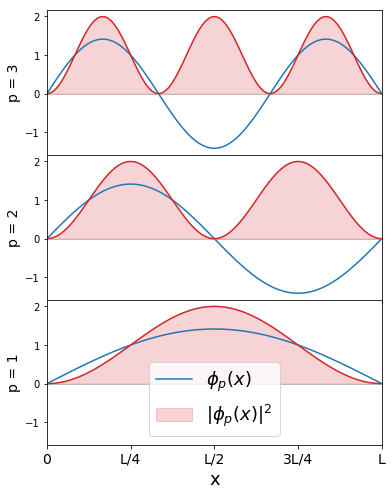

In [5]:
fig, axes = plt.subplots(nrows=3, figsize=(6, 8), sharex=True, sharey=True, gridspec_kw=dict(wspace=.05, hspace=.0))

L = 1
x = np.linspace(0, L, 100)
for i in range(3):
    p = 3 - i
    axes[i].plot(x, phi(x, p, L), label="$\phi_p(x)$")
    axes[i].plot(x, phi(x, p, L)**2, color="C3")    
    axes[i].fill(x, phi(x, p, L)**2, color="C3", label=r"$\left\vert\phi_p(x)\right\vert^2$", alpha=.2)
    axes[i].plot((0, L), (0, 0), color="C7", linewidth=.5)
    axes[i].set_ylabel("p = %d" % p, fontsize=14)
    
# layout
axes[2].set_xlim((0, L))
axes[2].set_xlabel("x", fontsize=18)
axes[2].legend(fontsize=18)
axes[2].set_xticks([0, L/4, L/2, 3*L/4, L])
text = axes[2].set_xticklabels(["0", "L/4", "L/2", "3L/4", "L"], fontsize=14)

## Visualisation de la densité de probabilité de présence

Le module au carré de la fonction d'onde représente la densité de probabilité de présence de la particule. C'est la seule information accessible, la trajectoire n'étant pas définie en mécanique quantique du fait qu'on ne peut pas connaîter à la fois la vitesse et la position de la particule. Pour visualiser la densité de probabilité de présence, on fait l'expérience suivante : on enregistre un grand nombre de fois (`ntry` fois ici) une photo du système et on superpose l'ensemble de ces photos. Le nuage de points obtenu correspond aux positions accessibles par la particule. Plus les points sont resserrés plus la probabilité de trouver la particule à cet endroit est grande.

Ici on réalise numériquement cette expérience en tirant aléatoirement des points en accord avec la densité de probabilité de présence $\left|\phi_p(x)\right|^2$.

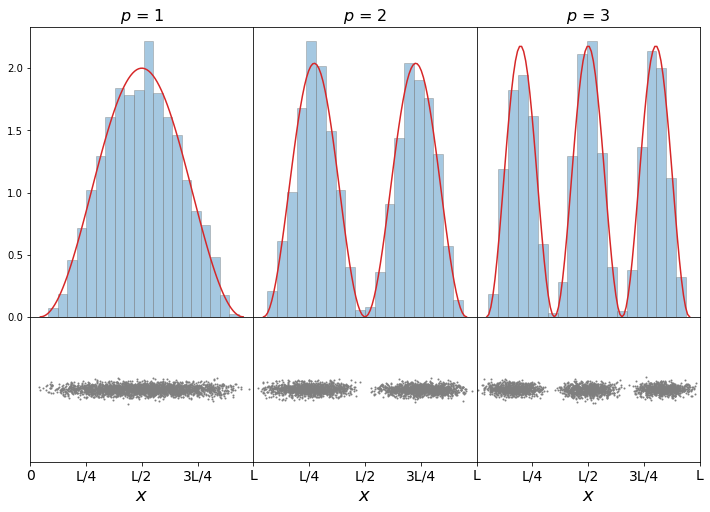

In [6]:
fig, axes = plt.subplots(
    nrows=2, ncols=3, figsize=(12, 8), 
    gridspec_kw=dict(wspace=0, hspace=.0, height_ratios=[2, 1])
)

# nombre de photos
ntry = 5000
# dimension de la boite
L = 1

jitter = .5
x = np.linspace(0, L, 100)
for i in range(3):
    p = i + 1
    
    # sample the density
    pos = np.random.uniform(0, L, ntry)
    rho = phi(pos, p, L)**2
    rnd = np.random.uniform(0, 2/L, ntry)
    ix = np.where(rho > rnd)
    pos = pos[ix]

    # plot
    axes[0, i].plot(x, phi(x, p, L)**2, color="C3")
    axes[0, i].hist(pos, bins=20, normed=True, alpha=.4, edgecolor="C7")
    axes[1, i].scatter(pos, np.random.normal(0, jitter, ix[0].shape), color="C7", s=1)

    # layout
    axes[0, i].set_title("$p$ = %d" % p, fontsize=16)
    axes[1, i].set_ylim(-10, 10)
    axes[1, i].yaxis.set_visible(False)
    axes[1, i].set_xlim((0, L))
    axes[1, i].set_xticks([0, L/4, L/2, 3*L/4, L])
    text = axes[1, i].set_xticklabels(["0", "L/4", "L/2", "3L/4", "L"], fontsize=14)
    axes[1, i].set_xlabel("$x$", fontsize=18)
    if i > 0:
        axes[0, i].yaxis.set_visible(False)
        axes[1, i].set_xticks([L/4, L/2, 3*L/4, L])
        text = axes[1, i].set_xticklabels(["L/4", "L/2", "3L/4", "L"], fontsize=14)
    else:
        axes[1, i].set_xticks([0, L/4, L/2, 3*L/4, L])
        text = axes[1, i].set_xticklabels(["0", "L/4", "L/2", "3L/4", "L"], fontsize=14)

fig.savefig("puits_infini.pdf")

Sur la figure ci-dessus :

* La courbe rouge est la densité de probabilité de présence exacte : $\left|\phi_p(x)\right|^2$
* L'histogramme est construit à partir de l'ensemble des positions de la particules. Les positions ont été choisies de sortes que cette histogramme correspondent à la densité de probabilité exacte.
* Les points gris correspondent à la superposition des photos du système.

On observe que :

* le nombre de points est important au voisinage des maxima de la densité de probabilité de présence
* le nombre de points est nul au voisinages des points nodaux (points où la fonction d'onde est nulle)